In [1]:
# Import libraries

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
# Symbolic differentiation

# Define variables
x, y = sp.symbols('x y', real=True)

# Define objective function f(x,y)
f = x**2 + y**2

# Gradient and Hessian (symbolic)
grad = sp.Matrix([sp.diff(f, var) for var in (x, y)])
H    = sp.hessian(f, (x, y))

print("f =", f)
print("∇f =", grad)
print("H =", H)

f = x**2 + y**2
∇f = Matrix([[2*x], [2*y]])
H = Matrix([[2, 0], [0, 2]])


In [3]:
# Convert SymPy object into NumPy object

f_fn    = sp.lambdify((x, y), f, "numpy")
grad_fn = sp.lambdify((x, y), grad, "numpy")
hess_fn = sp.lambdify((x, y), H, "numpy")

In [4]:
# Gradient descent example

theta = np.array([5, 5])   # initial guess [x0, y0]
alpha = 0.05                   # step size
n_iter = 5

for i in range(n_iter):
    g = np.array(grad_fn(theta[0], theta[1]), dtype=float).flatten()
    theta = theta - alpha * g
    print(f"iter {i+1:2d}: theta={theta}, f={f_fn(theta[0], theta[1])}")

iter  1: theta=[4.5 4.5], f=40.5
iter  2: theta=[4.05 4.05], f=32.805
iter  3: theta=[3.645 3.645], f=26.572049999999994
iter  4: theta=[3.2805 3.2805], f=21.523360499999995
iter  5: theta=[2.95245 2.95245], f=17.433922004999996


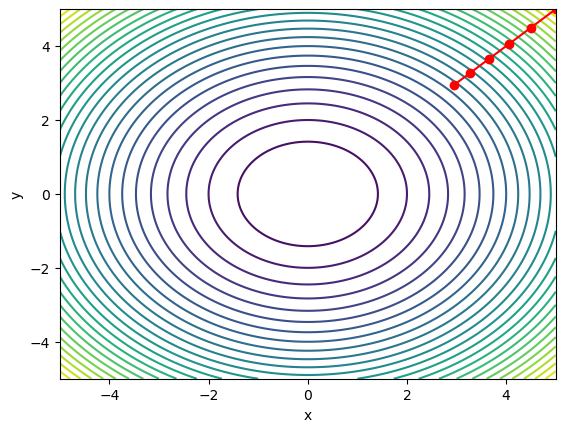

In [5]:
# Gradient descent example with trajectory plot

# Contour plot of f(x,y)
X, Y = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))
Z = f_fn(X, Y)

plt.contour(X, Y, Z, levels=30)
plt.xlabel("x")
plt.ylabel("y")

# Run GD again and plot trajectory
theta = np.array([5, 5])
traj = [theta.copy()]
for i in range(n_iter):
    g = np.array(grad_fn(theta[0], theta[1]), dtype=float).flatten()
    theta = theta - alpha * g
    traj.append(theta.copy())

traj = np.array(traj)
plt.plot(traj[:,0], traj[:,1], marker="o", color="red")
plt.show()